In [133]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [134]:
subjects = ['c1s01', 'c1s03', 'c1s05', 'c2s01', 'c2s02', 'c2s03', 'c2s04', 'c2s05']

In [135]:
results = {}
for subject_id in subjects:
    ecg_result_path = './results/ecg/{}/results.json'.format(subject_id)
    ppg_result_path = './results/ppg/{}/results.json'.format(subject_id)
    eda_result_path = './results/eda/{}/results.json'.format(subject_id)

    if not os.path.exists(ecg_result_path) or not os.path.exists(ppg_result_path) or not os.path.exists(eda_result_path):
        continue

    with open('./results/ecg/{}/results.json'.format(subject_id)) as f:
        beat_ecg_result = json.load(f)
    with open('./results/ppg/{}/results.json'.format(subject_id)) as f:
        beat_ppg_result = json.load(f)
    with open('./results/eda/{}/results.json'.format(subject_id)) as f:
        beat_eda_result = json.load(f)

    results[subject_id] = {
        'ECG': beat_ecg_result,
        'PPG': beat_ppg_result,
        'EDA': beat_eda_result
    }


In [136]:
print(results)

{'c1s01': {'ECG': {'accs': {'train': [0.803027567988292, 0.7844416916128608, 0.6666183782029739, 0.7719369116541756, 0.7416525508606591], 'val': [0.7588835627029534, 0.7702687816699714, 0.6524834998462351, 0.7620909890313324, 0.7307963787018568]}, 'eer_thresholds': [0.53606116771698, 0.3416595757007599, 0.4535430073738098, 0.5926393866539001, 0.3898150622844696], 'aucs': {'train': [0.8882772369631675, 0.92990588004327, 0.8246312055786134, 0.8633766464574391, 0.908732835576252], 'val': [0.85172542757246, 0.8549075465111307, 0.7268273013561131, 0.8333587778028094, 0.8113708715873649]}, 'specificities': {'train': [0.8034497162803779, 0.7756721676246987, 0.6566985301082753, 0.771314892788977, 0.731416485936129], 'val': [0.7588847938398763, 0.7702860673669445, 0.652487491423886, 0.7620877230350794, 0.730805197361945]}, 'sensitivities': {'train': [0.7965721152325839, 0.9171368893599775, 0.8166500560607948, 0.781376645408564, 0.9013397901533495], 'val': [0.7588643371017472, 0.7699863574351978

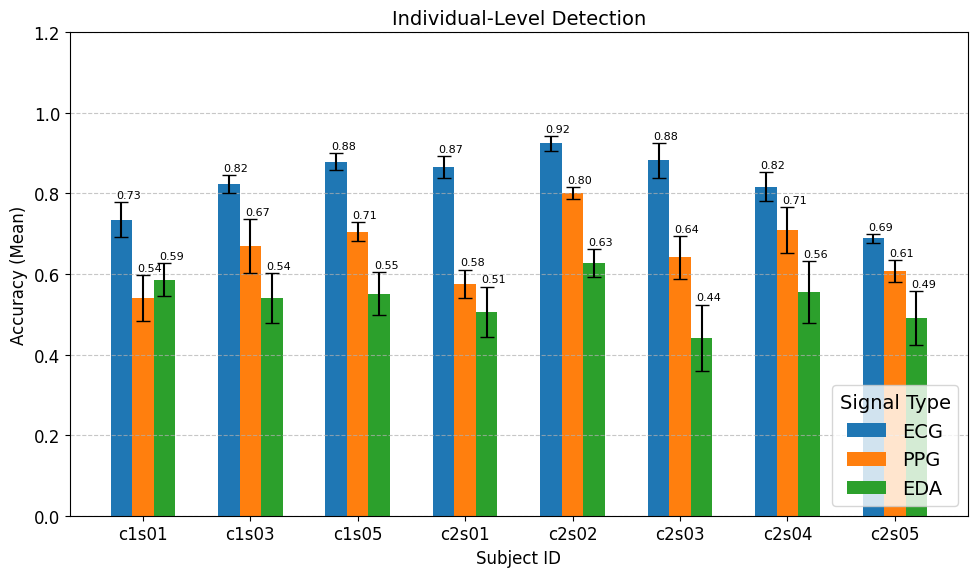

In [137]:
# Process data for the bar plot
subject_ids = list(results.keys())
categories = ['ECG', 'PPG', 'EDA']
x = np.arange(len(subject_ids))
bar_width = 0.2

# Extract mean accuracy for each category per subject
mean_accuracies = {
    category: [np.mean(results[subject_id][category]['accs']['val']) for subject_id in subject_ids]
    for category in categories
}

std_accuracies = {
    category: [np.std(results[subject_id][category]['accs']['val']) for subject_id in subject_ids]
    for category in categories
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(categories):
    ax.bar(
        x + i * bar_width,
        mean_accuracies[category],
        bar_width,
        yerr=std_accuracies[category],
        capsize=5,
        label=category
    )

    # Add text labels
    for j, (acc,std) in enumerate(zip(mean_accuracies[category],std_accuracies[category])):
        ax.text(
            x[j] + i * bar_width - 0.05,
            acc + std + 0.01,
            "{:.2f}".format(acc),
            fontsize=8
        )


# Formatting the plot
ax.set_xlabel('Subject ID', fontsize=12)
ax.set_ylabel('Accuracy (Mean)', fontsize=12)
ax.set_title('Individual-Level Detection', fontsize=14)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(subject_ids)
ax.set_ylim(0, 1.2)
ax.legend(title="Signal Type", loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [138]:
cgm_results = {}
for subject_id in subjects:
    MoE_results_path = './results/MoE/{}/main.log'.format(subject_id)
    if not os.path.exists(MoE_results_path):
        continue

    ECG_cgm_accs = []
    PPG_cgm_accs = []
    EDA_cgm_accs = []
    MoE_cgm_accs = []
    with open(MoE_results_path) as f:
        lines = f.readlines()
        for line in lines:
            if 'Majority Vote' in line:
                ecg_acc = float(line.split('|')[0].split(' ')[-1])
                ppg_acc = float(line.split('|')[1].split(' ')[-1])
                eda_acc = float(line.split('|')[2].split(' ')[-1])

                ECG_cgm_accs.append(ecg_acc)
                PPG_cgm_accs.append(ppg_acc)
                EDA_cgm_accs.append(eda_acc)

            if 'MoE' in line:
                acc = float(line.split(' ')[-1])
                MoE_cgm_accs.append(acc)

    ECG_cgm_accs = np.array(ECG_cgm_accs)
    PPG_cgm_accs = np.array(PPG_cgm_accs)
    EDA_cgm_accs = np.array(EDA_cgm_accs)
    MoE_cgm_accs = np.array(MoE_cgm_accs)

    cgm_results[subject_id] = {
        'mv/ECG': ECG_cgm_accs,
        'mv/PPG': PPG_cgm_accs,
        'mv/EDA': EDA_cgm_accs,
        'lr/ECG+PPG+EDA': MoE_cgm_accs
    }


# # Process data for the bar plot
# subject_ids = list(cgm_results.keys())
# categories = ['mv/ECG', 'mv/PPG', 'mv/EDA', 'lr/ECG+PPG+EDA']
# x = np.arange(len(subject_ids))
# bar_width = 0.2

# # Extract mean accuracy for each category per subject
# mean_accuracies = {
#     category: [np.mean(cgm_results[subject_id][category]) for subject_id in subject_ids]
#     for category in categories
# }

# std_accuracies = {
#     category: [np.std(cgm_results[subject_id][category]) for subject_id in subject_ids]
#     for category in categories
# }

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))

# for i, category in enumerate(categories):
#     ax.bar(
#         x + i * bar_width,
#         mean_accuracies[category],
#         bar_width,
#         yerr=std_accuracies[category],
#         capsize=5,
#         label=category
#     )

#     # Add text labels
#     for j, (acc,std) in enumerate(zip(mean_accuracies[category],std_accuracies[category])):
#         ax.text(
#             x[j] + i * bar_width - 0.05,
#             acc + std + 0.01,
#             "{:.2f}".format(acc),
#             fontsize=8
#         )


# # Formatting the plot
# ax.set_xlabel('Subject ID', fontsize=12)
# ax.set_ylabel('Accuracy (Mean)', fontsize=12)
# ax.set_title('CGM-Level Detection', fontsize=14)
# ax.set_xticks(x + bar_width)
# ax.set_xticklabels(subject_ids)
# ax.set_ylim(0, 1.2)
# ax.legend(title="Input Type", loc='lower right')
# ax.grid(axis='y', linestyle='--', alpha=0.7)

# # Show the plot
# plt.tight_layout()
# plt.show()


In [139]:
for subject_id in subjects:
    MoE_results_path = './results/MoE_mv/{}/main.log'.format(subject_id)
    if not os.path.exists(MoE_results_path):
        continue

    MoE_cgm_accs = []
    with open(MoE_results_path) as f:
        lines = f.readlines()
        for line in lines:
            if 'MoE' in line:
                acc = float(line.split(' ')[-1])
                MoE_cgm_accs.append(acc)
    MoE_cgm_accs = np.array(MoE_cgm_accs)
    cgm_results[subject_id]['lr_mv/ECG+PPG+EDA'] = MoE_cgm_accs

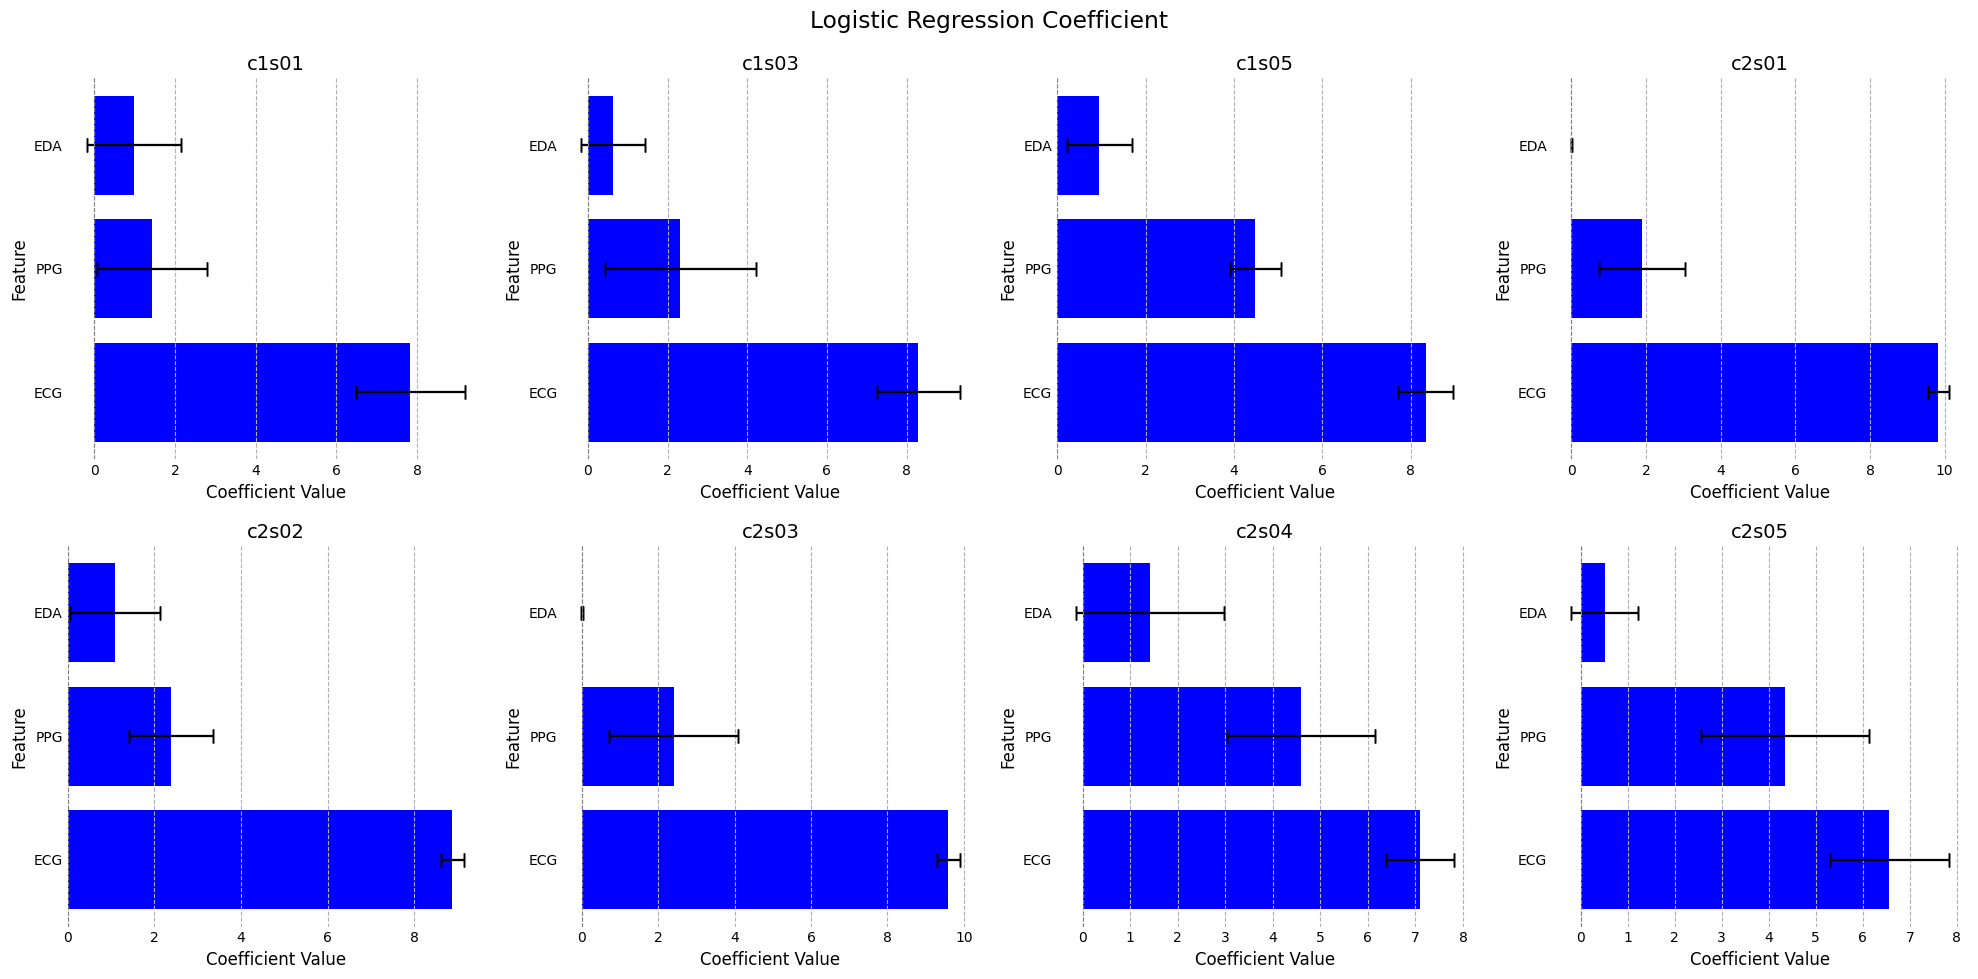

In [140]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, subject_id in enumerate(subject_ids):

    importance = defaultdict(list)
    for k in range(5):
        train_data = pd.read_csv(f'./results/MoE/{subject_id}/v{k+1}/MoE_train.csv')
        val_data = pd.read_csv(f'./results/MoE/{subject_id}/v{k+1}/MoE_val.csv')
        
        model = LogisticRegression(class_weight='balanced')
        model.fit(train_data[['ecg', 'ppg', 'eda']], train_data['label'])

        coefficients = model.coef_[0]
        importance['ECG'].append(coefficients[0])
        importance['PPG'].append(coefficients[1])
        importance['EDA'].append(coefficients[2])

    importance = pd.DataFrame(importance)
    for _ in range(3):
        ax[i//4, i%4].barh(
            importance.columns,
            importance.mean(),
            xerr=importance.std(),
            capsize=5,
            color=np.where(importance.mean() > 0, 'blue', 'red')
        )

    ax[i//4, i%4].set_xlabel("Coefficient Value", fontsize=12)
    ax[i//4, i%4].set_ylabel("Feature", fontsize=12)
    ax[i//4, i%4].set_title(f"{subject_id}", fontsize=14)
    ax[i//4, i%4].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)  # Line at zero for reference
    ax[i//4, i%4].set_yticks([0, 1, 2])
    ax[i//4, i%4].set_yticklabels(['ECG', 'PPG', 'EDA'])
    ax[i//4, i%4].grid(axis='x', linestyle='--', linewidth=0.8)
    ax[i//4, i%4].spines['top'].set_visible(False)
    ax[i//4, i%4].spines['right'].set_visible(False)
    ax[i//4, i%4].spines['bottom'].set_visible(False)
    ax[i//4, i%4].spines['left'].set_visible(False)
    ax[i//4, i%4].tick_params(axis='both', which='both', length=0)
    ax[i//4, i%4].tick_params(axis='x', which='major', labelsize=10)
    ax[i//4, i%4].tick_params(axis='y', which='major', labelsize=10)

plt.suptitle('Logistic Regression Coefficient')
plt.tight_layout()
plt.show()


In [141]:
# comparison between differnet models
categories = ['lr/ECG+PPG+EDA','lr/ECG+PPG', 'lr/PPG+EDA']
for subject_id in subjects:
    for mode in range(1, 3):
        MoE_results_path = './results/MoE_mode{}/{}/main.log'.format(mode, subject_id)
        if not os.path.exists(MoE_results_path):
            continue
        mode_name = categories[mode]
        MoE_cgm_accs = []
        with open(MoE_results_path) as f:
            lines = f.readlines()
            for line in lines:
                if 'MoE' in line:
                    acc = float(line.split(' ')[-1])
                    MoE_cgm_accs.append(acc)
        MoE_cgm_accs = np.array(MoE_cgm_accs)
        cgm_results[subject_id][mode_name] = MoE_cgm_accs


In [155]:
def show_plot(cgm_results, categories, title='CGM-Level Detection'):
    # Process data for the bar plot
    subject_ids = list(cgm_results.keys())
    x = np.arange(len(subject_ids))
    bar_width = 0.15

    # Extract mean accuracy for each category per subject
    mean_accuracies = {
        category: [np.mean(cgm_results[subject_id][category]) for subject_id in subject_ids]
        for category in categories
    }

    std_accuracies = {
        category: [np.std(cgm_results[subject_id][category]) for subject_id in subject_ids]
        for category in categories
    }

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 8))
    # set the font size
    plt.rcParams.update({
        'font.size': 14, 
        'axes.labelsize': 16, 
        'axes.titlesize': 18, 
        'xtick.labelsize': 12, 
        'ytick.labelsize': 12
    })

    for i, category in enumerate(categories):
        ax.bar(
            x + i * bar_width,
            mean_accuracies[category],
            bar_width,
            yerr=std_accuracies[category],
            capsize=5,
            label=category
        )

        # Add text labels
        for j, (acc,std) in enumerate(zip(mean_accuracies[category],std_accuracies[category])):
            ax.text(
                x[j] + i * bar_width - 0.05,
                acc + std + 0.01,
                "{:.2f}".format(acc),
                fontsize=12
            )


    # Formatting the plot
    ax.set_xlabel('Subject ID')
    ax.set_ylabel('Accuracy (Mean)')
    ax.set_title(title)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(subject_ids)
    ax.set_ylim(0, 1.2)
    ax.legend(title="Input Type", loc='lower right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


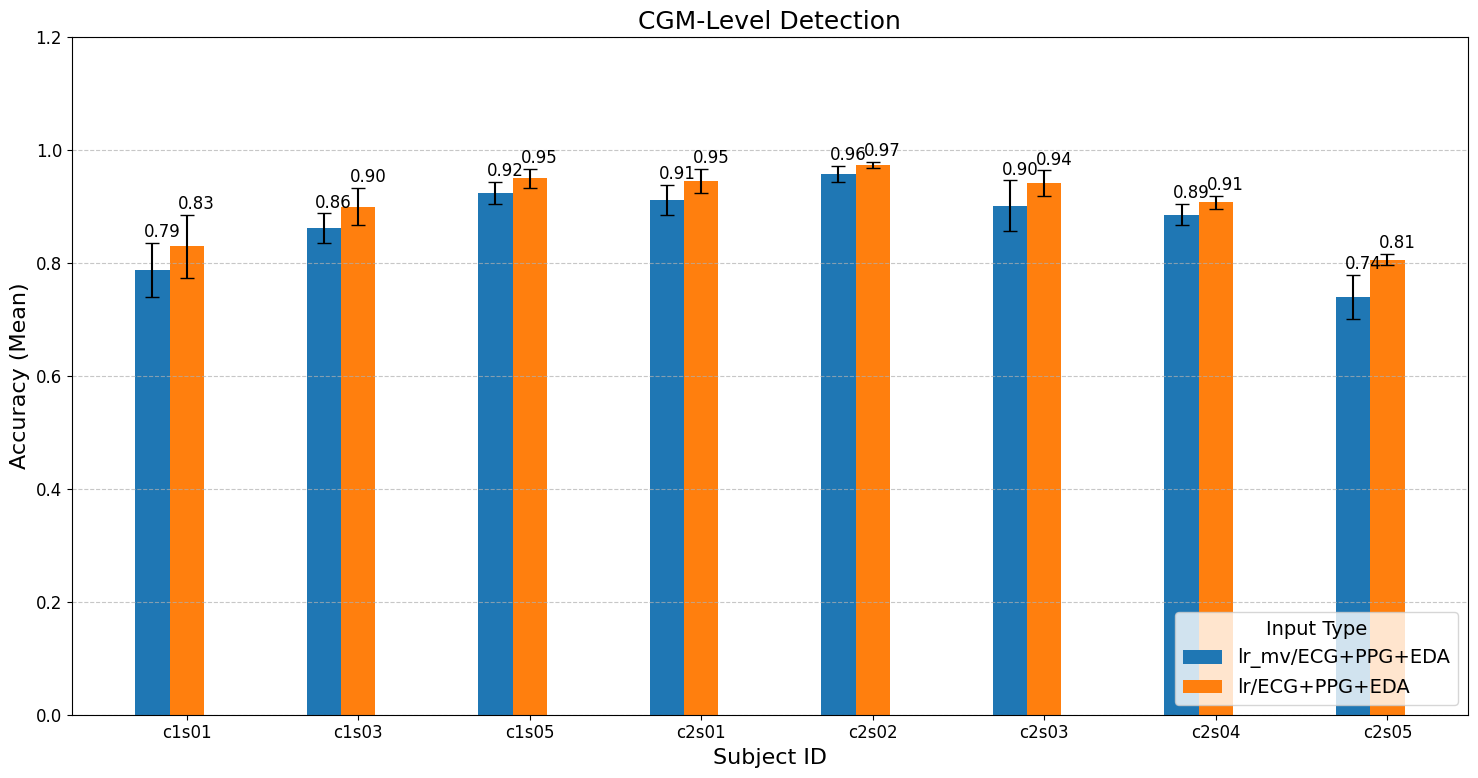

In [147]:
show_plot(cgm_results, ['lr_mv/ECG+PPG+EDA', 'lr/ECG+PPG+EDA'], title='CGM-Level Detection')

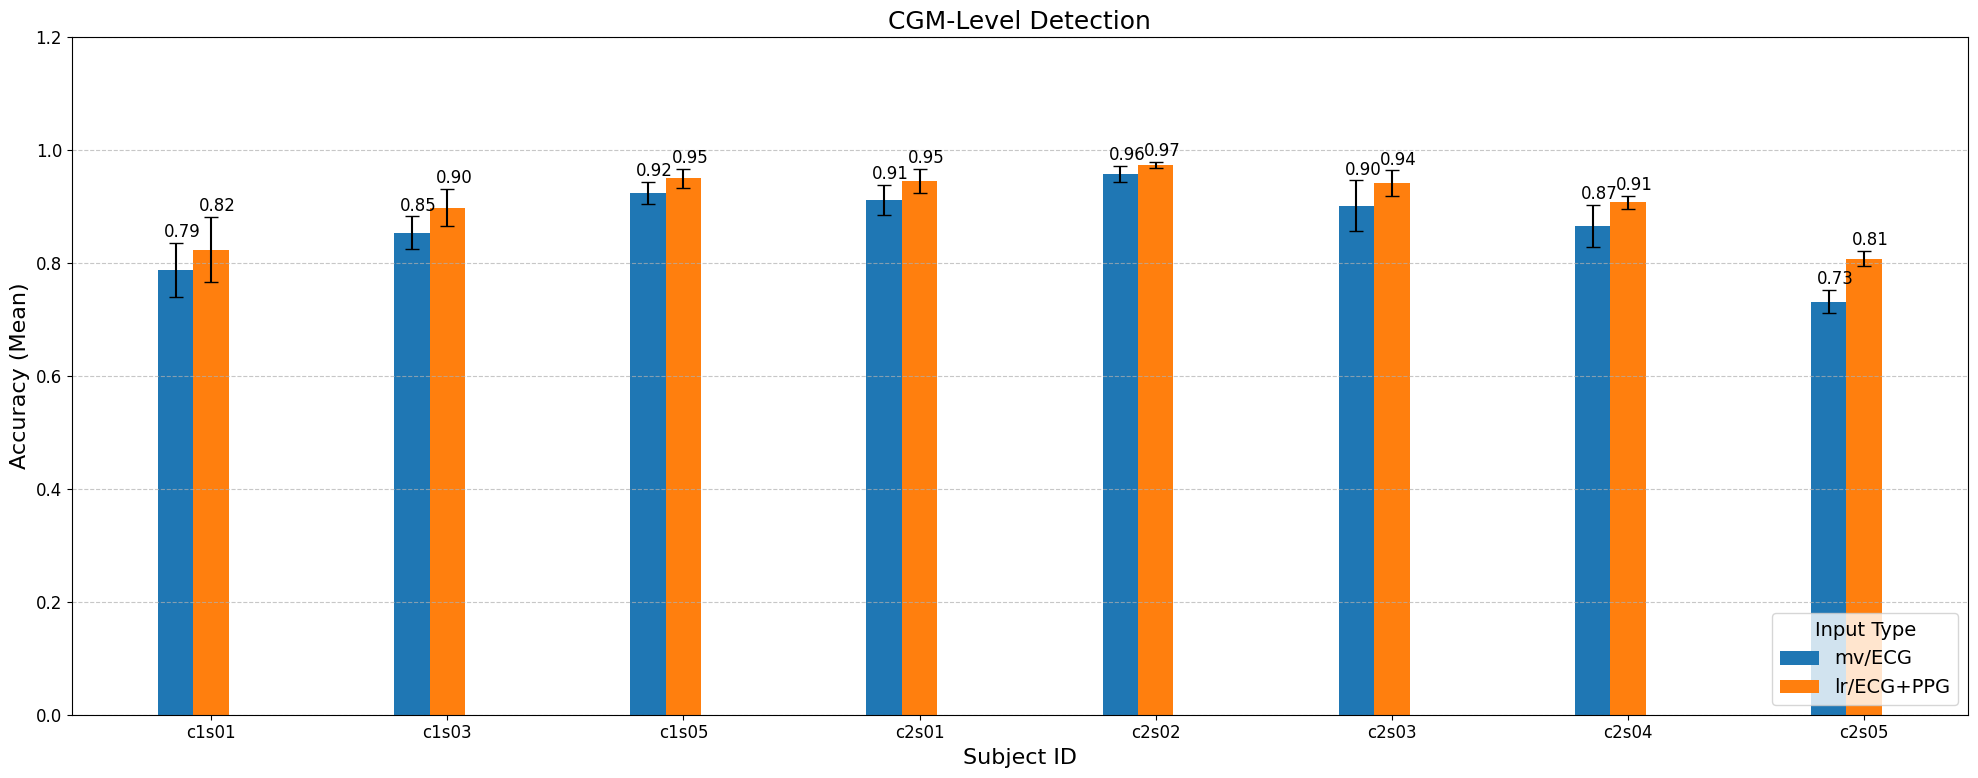

In [157]:
show_plot(cgm_results, ['mv/ECG', 'lr/ECG+PPG'], title='CGM-Level Detection')

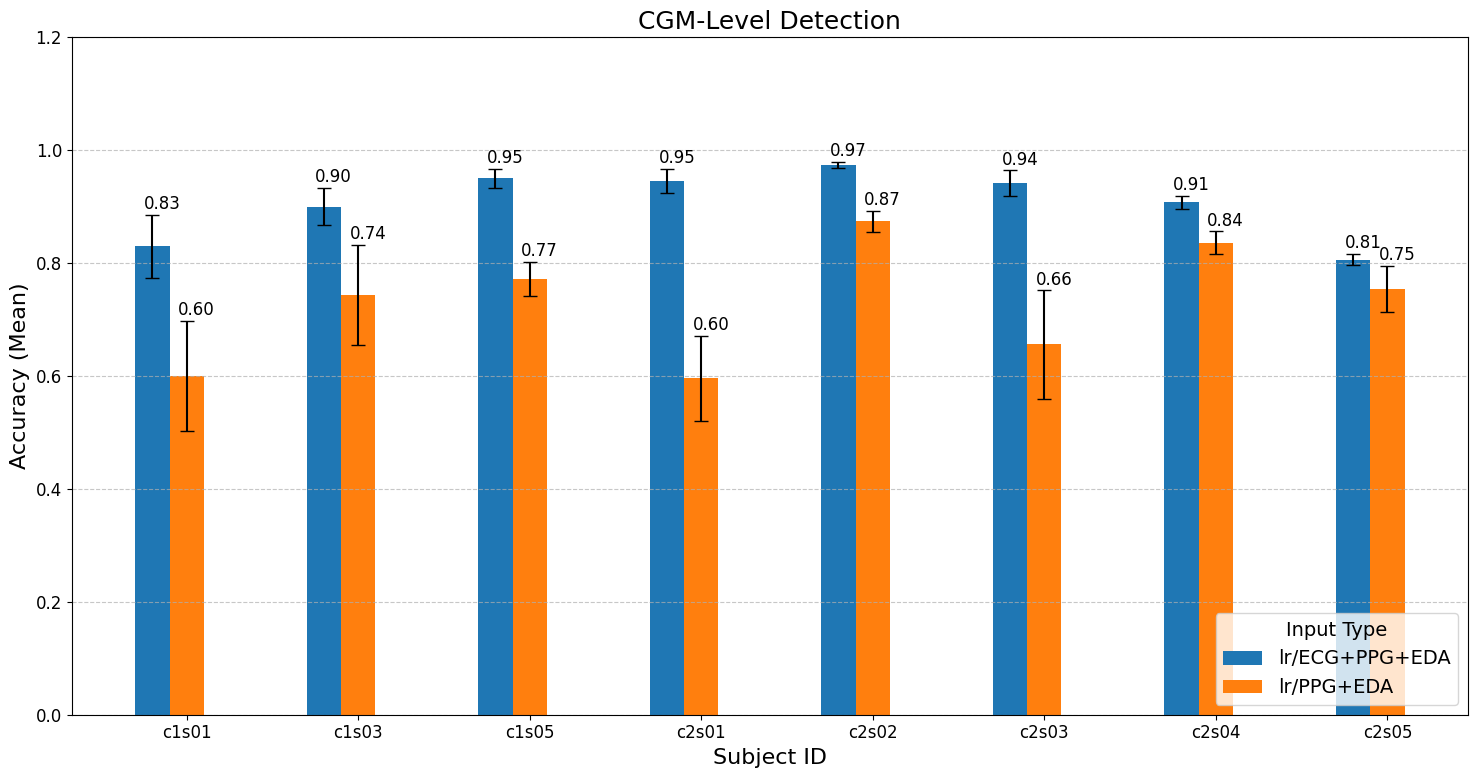

In [149]:
show_plot(cgm_results, ['lr/ECG+PPG+EDA', 'lr/PPG+EDA'])

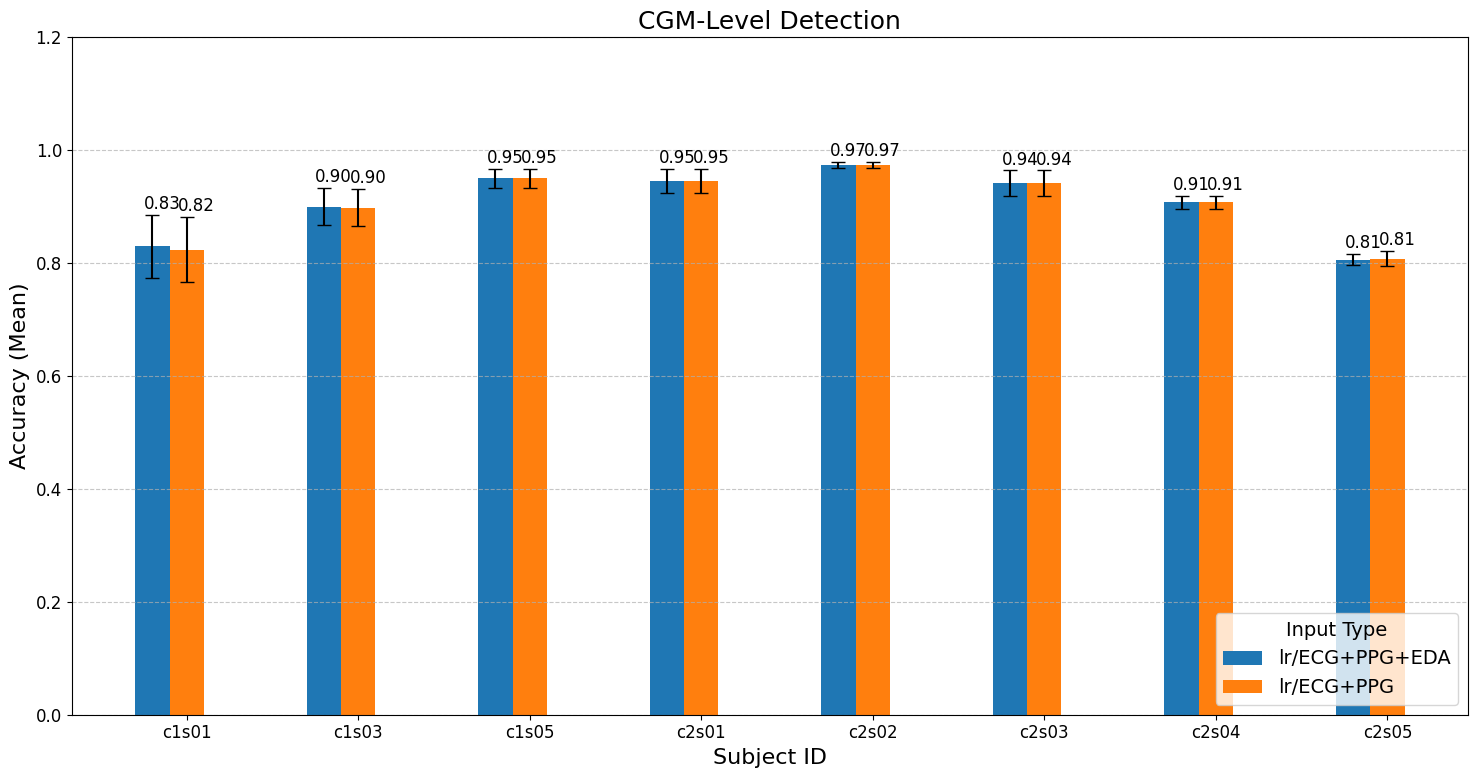

In [150]:
show_plot(cgm_results, ['lr/ECG+PPG+EDA', 'lr/ECG+PPG'])

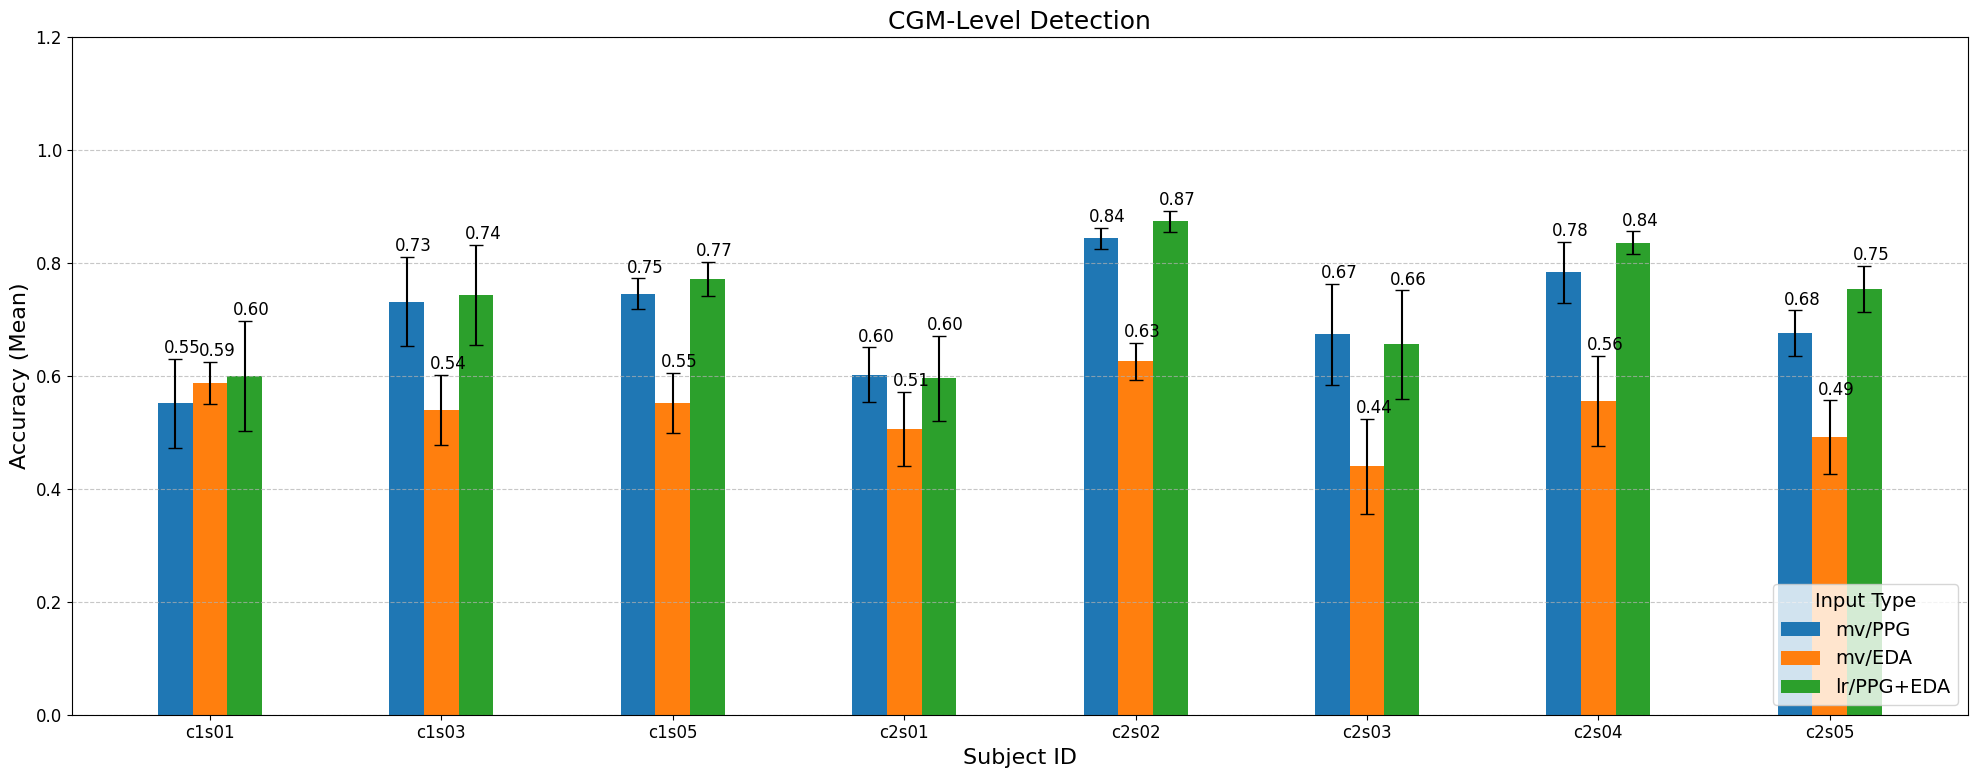

In [ ]:
show_plot(cgm_results, ['mv/PPG', 'mv/EDA', 'lr/PPG+EDA'])

In [88]:
import pandas as pd

data = {
    "Variant": [
        "mv/ECG", "mv/PPG", "mv/EDA", 
        "lr/ECG+PPG", "lr/PPG+EDA", 
        "lr/ECG+PPG+EDA", "lr_mv/ECG+PPG+EDA"
    ],
}
for subject_id in subjects:
    for variant in data["Variant"]:
        if variant in cgm_results[subject_id]:
            if subject_id not in data:
                data[subject_id] = []
            data[subject_id].append(np.mean(cgm_results[subject_id][variant]))

# Calculate the average accuracy for each variant
data["Average"] = []
for i, variant in enumerate(data["Variant"]):
    data["Average"].append(np.mean([data[subject_id][i] for subject_id in subjects]))


# Create the DataFrame
df = pd.DataFrame(data)
for col in df.columns[1:]:  # Exclude 'Variant' and 'Average'
    df[col] = df[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Generate LaTeX code
latex_code = df.to_latex(index=False, column_format="lcccccccc|c", 
                         caption="Comparison of accuracy at EER.", 
                         label="tab:comparison", 
                         escape=False, 
                         bold_rows=False)

# Print the LaTeX code
print(latex_code)


\begin{table}
\caption{Comparison of accuracy at EER.}
\label{tab:comparison}
\begin{tabular}{lcccccccc|c}
\toprule
Variant & c1s01 & c1s03 & c1s05 & c2s01 & c2s02 & c2s03 & c2s04 & c2s05 & Average \\
\midrule
mv/ECG & 0.79 & 0.85 & 0.92 & 0.91 & 0.96 & 0.90 & 0.87 & 0.73 & 0.87 \\
mv/PPG & 0.55 & 0.73 & 0.75 & 0.60 & 0.84 & 0.67 & 0.78 & 0.68 & 0.70 \\
mv/EDA & 0.59 & 0.54 & 0.55 & 0.51 & 0.63 & 0.44 & 0.56 & 0.49 & 0.54 \\
lr/ECG+PPG & 0.82 & 0.90 & 0.95 & 0.95 & 0.97 & 0.94 & 0.91 & 0.81 & 0.91 \\
lr/PPG+EDA & 0.60 & 0.74 & 0.77 & 0.60 & 0.87 & 0.66 & 0.84 & 0.75 & 0.73 \\
lr/ECG+PPG+EDA & 0.83 & 0.90 & 0.95 & 0.95 & 0.97 & 0.94 & 0.91 & 0.81 & 0.91 \\
lr_mv/ECG+PPG+EDA & 0.83 & 0.92 & 0.97 & 0.95 & 0.98 & 0.95 & 0.93 & 0.80 & 0.91 \\
\bottomrule
\end{tabular}
\end{table}

